# Test Cascade and Parallel NAS deployed on the XEM7310 Artix-7 board using the OKAERTool

This notebook is a simple example of how to test the Cascade and Parallel NAS model deployed both on the XEM7310 Artix-7 board using the OKAERTool (deployed on the same FPGA board too). The pyOKAERTool is a Python package that provides a simple interface to interact with the OKAERTool IP block. The OKAERTool IP an open-source hardware platform that can be used to deploy and test AER based systems on the edge.

## Monitoring the CPNAS outputs
The okaertool is deployed on the Artix-7 FPGA where a stereo 64 channels Cascade and Parallel NAS are deployed. The script below initializes the OKAERTool and configure the settings to pyNAVIS tool. This tool is used to visualize the AER events received from the Neuromorphic Auditory Sensor (NAS).

In [ ]:
import sys
import os
import time

# Add the parent directory to the path to import pyOKAERTool
sys.path.insert(0, os.path.abspath('..'))
import pyOKAERTool as okt
from pyNAVIS import *
import os

# Define bitfile path
bitfile_path = '../../bitfiles/CNAS_okaertool_XEM6310.bit'
# bitfile_path = None  # Set to None if no .bit file is to be used

# Validate the existence of the .bit file
if bitfile_path is None:
    None
elif not os.path.exists(bitfile_path):
    print(f"El archivo .bit no existe en la ruta especificada: {bitfile_path}")
    sys.exit(1)

# Create a new intance of the OkaerTool class and initialize it
okaer = okt.Okaertool(bit_file=bitfile_path)
okaer.init()

# Create a new instance of the PyNAVIS class
settings = MainSettings(num_channels=64, mono_stereo=1, on_off_both=1, address_size=4, ts_tick=0.01, bin_size=10000)

11/11/25 12:30:57 PM - INFO : Device product ID: 22, product name: XEM6310-LX150, USB speed: 3,
11/11/25 12:30:57 PM - INFO : USB 3.0 SuperSpeed. USB block size set to 16 KB
11/11/25 12:30:57 PM - INFO : okaertool initialized as idle


### Configure Cascade and Parallel NAS
Both NAS sensors need to be configure before testing. The configuration is done using the `set_config` method of the OKAERTool class. The configuration parameters are passed as a list of values. The parameters are:
- PDM2Spikes_DEFAULT_parameter
- I2S2Spikes_DEFAULT_parameter
- CASCADE_FILTER_DEFAULT_parameter
- PARALLEL_FILTER_DEFAULT_parameter


In [18]:
PDM2Spikes_DEFAULT_parameter = [0x0005, 0x0006, 0x734B, 0x39C8]
I2S2Spikes_DEFAULT_parameter = [0x000F]

CASCADE_FILTER_DEFAULT_parameter = [
    	0x04, 0x77B4, 0x77B4, 0x2025, 
		0x04, 0x6B1C, 0x6B1C, 0x2025,
		0x02, 0x7303, 0x7303, 0x2025, 
		0x02, 0x66E9, 0x66E9, 0x2025, 
		0x03, 0x7AC8, 0x7AC8, 0x2025, 
		0x03, 0x6DDD, 0x6DDD, 0x2025, 
		0x04, 0x7AE1, 0x7AE1, 0x2025, 
		0x04, 0x6DF4, 0x6DF4, 0x2025, 
		0x02, 0x7610, 0x7610, 0x2025, 
		0x02, 0x69A4, 0x69A4, 0x2025, 
		0x03, 0x7E0A, 0x7E0A, 0x2025, 
		0x03, 0x70C7, 0x70C7, 0x2025, 
		0x04, 0x7E24, 0x7E24, 0x2025, 
		0x04, 0x70DF, 0x70DF, 0x2025, 
		0x02, 0x7932, 0x7932, 0x2025, 
		0x02, 0x6C72, 0x6C72, 0x2025, 
		0x02, 0x6109, 0x6109, 0x2025, 
		0x03, 0x73C5, 0x73C5, 0x2025, 
		0x03, 0x6797, 0x6797, 0x2025, 
		0x04, 0x73DD, 0x73DD, 0x2025, 
		0x02, 0x7C69, 0x7C69, 0x2025, 
		0x02, 0x6F52, 0x6F52, 0x2025, 
		0x02, 0x639C, 0x639C, 0x2025, 
		0x03, 0x76D8, 0x76D8, 0x2025, 
		0x03, 0x6A57, 0x6A57, 0x2025, 
		0x04, 0x76F1, 0x76F1, 0x2025, 
		0x02, 0x7FB6, 0x7FB6, 0x2025, 
		0x02, 0x7247, 0x7247, 0x2025, 
		0x02, 0x6641, 0x6641, 0x2025, 
		0x03, 0x79FF, 0x79FF, 0x2025, 
		0x03, 0x6D29, 0x6D29, 0x2025, 
		0x04, 0x7A19, 0x7A19, 0x2025, 
		0x04, 0x6D40, 0x6D40, 0x2025, 
		0x02, 0x754F, 0x754F, 0x2025, 
		0x02, 0x68F7, 0x68F7, 0x2025, 
		0x03, 0x7D3C, 0x7D3C, 0x2025, 
		0x03, 0x700F, 0x700F, 0x2025, 
		0x04, 0x7D56, 0x7D56, 0x2025, 
		0x04, 0x7026, 0x7026, 0x2025, 
		0x02, 0x786C, 0x786C, 0x2025, 
		0x02, 0x6BC1, 0x6BC1, 0x2025, 
		0x02, 0x606A, 0x606A, 0x2025, 
		0x03, 0x7308, 0x7308, 0x2025, 
		0x03, 0x66EE, 0x66EE, 0x2025, 
		0x04, 0x7320, 0x7320, 0x2025, 
		0x02, 0x7B9E, 0x7B9E, 0x2025, 
		0x02, 0x6E9C, 0x6E9C, 0x2025, 
		0x02, 0x62F9, 0x62F9, 0x2025, 
		0x03, 0x7615, 0x7615, 0x2025, 
		0x03, 0x69A9, 0x69A9, 0x2025, 
		0x04, 0x762E, 0x762E, 0x2025, 
		0x02, 0x7EE6, 0x7EE6, 0x2025, 
		0x02, 0x718C, 0x718C, 0x2025, 
		0x02, 0x659A, 0x659A, 0x2025, 
		0x03, 0x7937, 0x7937, 0x2025, 
		0x03, 0x6C77, 0x6C77, 0x2025, 
		0x04, 0x7951, 0x7951, 0x2025, 
		0x04, 0x6C8E, 0x6C8E, 0x2025, 
		0x02, 0x748F, 0x748F, 0x2025, 
		0x02, 0x684C, 0x684C, 0x2025, 
		0x03, 0x7C6F, 0x7C6F, 0x2025, 
		0x03, 0x6F57, 0x6F57, 0x2025,
		0x04, 0x7C89, 0x7C89, 0x2025, 
		0x04, 0x6F6F, 0x6F6F, 0x2025, 
		0x02, 0x77A7, 0x77A7, 0x2025]

PARALLEL_FILTER_DEFAULT_parameter = [
    	0x00, 0x7FFF, 0x1012, 0x5E5C, 
		0x00, 0x7FFF, 0x1012, 0x546E, 
		0x00, 0x7FFF, 0x1012, 0x4B8C,
		0x00, 0x7FFF, 0x1012, 0x439A, 
		0x00, 0x7FFF, 0x1012, 0x78FB, 
		0x00, 0x7FFF, 0x1012, 0x6C41, 
		0x00, 0x7FFF, 0x1012, 0x60DD,
		0x00, 0x7FFF, 0x1012, 0x56AC, 
		0x00, 0x7FFF, 0x1012, 0x4D8E, 
		0x00, 0x7FFF, 0x1012, 0x4565, 
		0x00, 0x7FFF, 0x1012, 0x7C31,
		0x00, 0x7FFF, 0x1012, 0x6F20, 
		0x00, 0x7FFF, 0x1012, 0x636F, 
		0x00, 0x7FFF, 0x1012, 0x58F9, 
		0x00, 0x7FFF, 0x1012, 0x4F9C,
		0x00, 0x7FFF, 0x1012, 0x473C, 
		0x00, 0x7FFF, 0x1012, 0x7F7D, 
		0x00, 0x7FFF, 0x1012, 0x7213, 
		0x00, 0x7FFF, 0x1012, 0x6612,
		0x00, 0x7FFF, 0x1012, 0x5B55, 
		0x00, 0x7FFF, 0x1012, 0x51B9, 
		0x00, 0x7FFF, 0x1012, 0x4920, 
		0x00, 0x7FFF, 0x1012, 0x416F,
		0x00, 0x7FFF, 0x1012, 0x751A, 
		0x00, 0x7FFF, 0x1012, 0x68C8, 
		0x00, 0x7FFF, 0x1012, 0x5DC2, 
		0x00, 0x7FFF, 0x1012, 0x53E4,
		0x00, 0x7FFF, 0x1012, 0x4B11, 
		0x00, 0x7FFF, 0x1012, 0x432B, 
		0x00, 0x7FFF, 0x1012, 0x7835, 
		0x00, 0x7FFF, 0x1012, 0x6B90,
		0x00, 0x7FFF, 0x1012, 0x603F, 
		0x00, 0x7FFF, 0x1012, 0x561E, 
		0x00, 0x7FFF, 0x1012, 0x4D0F, 
		0x00, 0x7FFF, 0x1012, 0x44F3,
		0x00, 0x7FFF, 0x1012, 0x7B66, 
		0x00, 0x7FFF, 0x1012, 0x6E6A, 
		0x00, 0x7FFF, 0x1012, 0x62CC, 
		0x00, 0x7FFF, 0x1012, 0x5867,
		0x00, 0x7FFF, 0x1012, 0x4F1A, 
		0x00, 0x7FFF, 0x1012, 0x46C8, 
		0x00, 0x7FFF, 0x1012, 0x7EAC, 
		0x00, 0x7FFF, 0x1012, 0x7158,
		0x00, 0x7FFF, 0x1012, 0x656C, 
		0x00, 0x7FFF, 0x1012, 0x5AC0, 
		0x00, 0x7FFF, 0x1012, 0x5134, 
		0x00, 0x7FFF, 0x1012, 0x48A9,
		0x00, 0x7FFF, 0x1012, 0x4104, 
		0x00, 0x7FFF, 0x1012, 0x745A, 
		0x00, 0x7FFF, 0x1012, 0x681D, 
		0x00, 0x7FFF, 0x1012, 0x5D28,
		0x00, 0x7FFF, 0x1012, 0x535B, 
		0x00, 0x7FFF, 0x1012, 0x4A96, 
		0x00, 0x7FFF, 0x1012, 0x42BD, 
		0x00, 0x7FFF, 0x1012, 0x7771,
		0x00, 0x7FFF, 0x1012, 0x6AE0, 
		0x00, 0x7FFF, 0x1012, 0x5FA1, 
		0x00, 0x7FFF, 0x1012, 0x5592, 
		0x00, 0x7FFF, 0x1012, 0x4C91,
		0x00, 0x7FFF, 0x1012, 0x4483, 
		0x00, 0x7FFF, 0x1012, 0x7A9C, 
		0x00, 0x7FFF, 0x1012, 0x6DB6, 
		0x00, 0x7FFF, 0x1012, 0x622B,
		0x00, 0x7FFF, 0x1012, 0x57D7, 
		0x00, 0x7FFF, 0x1012, 0x57D7]

### Load the config file exported from pyOpenNAS
The configuration parameters are loaded from a config file exported from the pyOpenNAS tool. The config file is a text file that contains the configuration parameters in a specific format. This file only contains the parameters for the Cascade NAS. This file has to be parsed to extract the parameters and save them in a list.

In [ ]:
import re
import os

config_file_path = './CFBank_64.vhd'

def _tok_to_int(tok):
    tok = tok.strip().rstrip(',').strip()
    if tok.lower().startswith('x"') and tok.endswith('"'):
        return int(tok[2:-1], 16)
    if tok.lower().startswith('0x'):
        return int(tok, 16)
    m = re.match(r'16#([0-9A-Fa-f]+)#', tok)
    if m:
        return int(m.group(1), 16)
    if tok.isdigit():
        return int(tok, 10)
    raise ValueError(f"Unrecognized token: {tok!r}")

def parse_cascade_vhd(path):
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    text = open(path, 'r', encoding='utf-8', errors='ignore').read()

    # Find successive groups of the four parameters in the file order
    pattern = re.compile(
        r'FREQ_DIV\s*=>\s*(?P<f>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_FB\s*=>\s*(?P<fb>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_OUT\s*=>\s*(?P<out>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_BPF\s*=>\s*(?P<bpf>[^,\n;]+)',
        re.IGNORECASE | re.DOTALL
    )

    values = []
    for m in pattern.finditer(text):
        f = _tok_to_int(m.group('f'))
        fb = _tok_to_int(m.group('fb'))
        out = _tok_to_int(m.group('out'))
        bpf = _tok_to_int(m.group('bpf'))
        values.extend([f, fb, out, bpf])

    return values

CASCADE_FILTER_DEFAULT_parameter = parse_cascade_vhd(config_file_path)

# quick validation / pretty print
filters = len(CASCADE_FILTER_DEFAULT_parameter) // 4
print(f"Parsed {filters} filters ({len(CASCADE_FILTER_DEFAULT_parameter)} values).")
print("CASCADE_FILTER_DEFAULT_parameter = [")
for v in CASCADE_FILTER_DEFAULT_parameter:
    # print as hex literal (4 hex digits minimum)
    width = max(2, (v.bit_length() + 3) // 4)
    print(f"    0x{v:0{width}X},")
print("]")

El siguiente código configura el NAS con los parámetros cargados en las listas PDM2Spikes_DEFAULT_parameter, I2S2Spikes_DEFAULT_parameter, CASCADE_FILTER_DEFAULT_parameter y PARALLEL_FILTER_DEFAULT_parameter.

In [23]:
# Reset the OkaerTool
okaer.reset_board(mode='external')

# # Configure the PDM2Spikes (left and right) for both NAS
# register_address = 0x0000
# okaer.logger.info("Configuring PDM2Spikes modules")
# # Left cochlea
# okaer.logger.info("Left cochlea")
# for value in PDM2Spikes_DEFAULT_parameter:
#     okaer.set_config('port_a', register_address, value)
#     # okaer.set_config('port_b', register_address, value)
#     register_address += 1
# # Right cochlea
# okaer.logger.info("Right cochlea")
# for value in PDM2Spikes_DEFAULT_parameter:
#     okaer.set_config('port_a', register_address, value)
#     # okaer.set_config('port_b', register_address, value)
#     register_address += 1

register_address = 0x08
okaer.logger.info("Configuring I2S2Spikes modules")
# Configure I2S2Spikes modules for both NAS
for value in I2S2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    # okaer.set_config('port_b', register_address, value)

# Configure the filters for CASCADE NAS
okaer.logger.info("Configuring filters for Cascade NAS")
# Left cochlea
register_address = 0x09
okaer.logger.info("Left cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
    # # Config only 32 filters
    # if register_address >= 0x09 + 32*4:
    #     break
# Right cochlea
register_address = 0x010D
okaer.logger.info("Right cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
    # # Config only 32 filters
    # if register_address >= 0x010D + 32*4:
    #     break


# # Configure the filters for PARALLEL NAS
# register_address = 0x09
# okaer.logger.info("Configuring filters for Parallel NAS")
# # Left cochlea
# okaer.logger.info("Left cochlea")
# for value in PARALLEL_FILTER_DEFAULT_parameter:
#     okaer.set_config('port_b', register_address, value)
#     register_address += 1
# # Right cochlea
# okaer.logger.info("Right cochlea")
# for value in PARALLEL_FILTER_DEFAULT_parameter:
#     okaer.set_config('port_b', register_address, value)
#     register_address += 1


11/11/25 12:32:36 PM - INFO : Board reset in mode: external
11/11/25 12:32:36 PM - INFO : Configuring I2S2Spikes modules
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0x8 and value 0xf
11/11/25 12:32:36 PM - INFO : Configuring filters for Cascade NAS
11/11/25 12:32:36 PM - INFO : Left cochlea
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0x9 and value 0x4
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xa and value 0x77b4
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xb and value 0x77b4
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xc and value 0x2025
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xd and value 0x4
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xe and value 0x6b1c
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0xf and value 0x6b1c
11/11/25 12:32:36 PM - INFO : Configuring port_a with address 0x10 and value 0x2025
11/11/25 12:32:36 PM - INFO : C

### Monitor de NAS outputs
The script below monitors the output of the NAS.

11/11/25 12:38:42 PM - INFO : Monitoring for a duration of 25 seconds
11/11/25 12:38:42 PM - INFO : Timestamp reset
11/11/25 12:38:42 PM - INFO : Starting monitoring - USB buffer: 0.03 MB
11/11/25 12:39:07 PM - INFO : Duration limit reached: 25.00 seconds
11/11/25 12:39:07 PM - INFO : Monitoring completed: 25.00 seconds, 32539213 spikes captured
11/11/25 12:39:07 PM - INFO : Input 0: 32539213 spikes
11/11/25 12:39:07 PM - INFO : Input 1: 0 spikes
11/11/25 12:39:07 PM - INFO : Input 2: 0 spikes
11/11/25 12:39:07 PM - INFO : Creating spike files for all selected inputs
11/11/25 12:39:09 PM - INFO : === DATA INTEGRITY CHECK ===
11/11/25 12:39:10 PM - INFO : \--- Input port_a ---
11/11/25 12:39:10 PM - INFO : Total spikes: 32539213
11/11/25 12:39:10 PM - INFO : Timestamp range (ticks): 19 - 2511709114
11/11/25 12:39:10 PM - INFO : Timestamp range (µs): 0.19 - 25117091.14
11/11/25 12:39:10 PM - INFO : Duration (ms): 25117.09
11/11/25 12:39:10 PM - INFO : Address range: 1 - 255
11/11/25 12:3

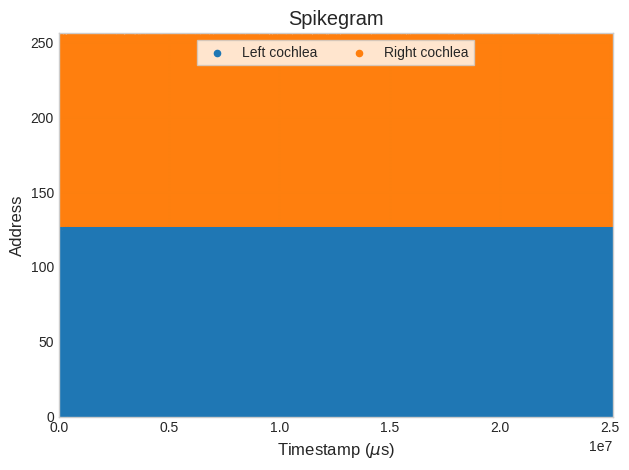

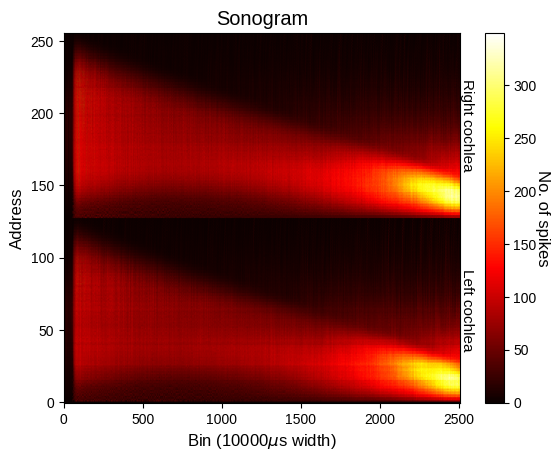

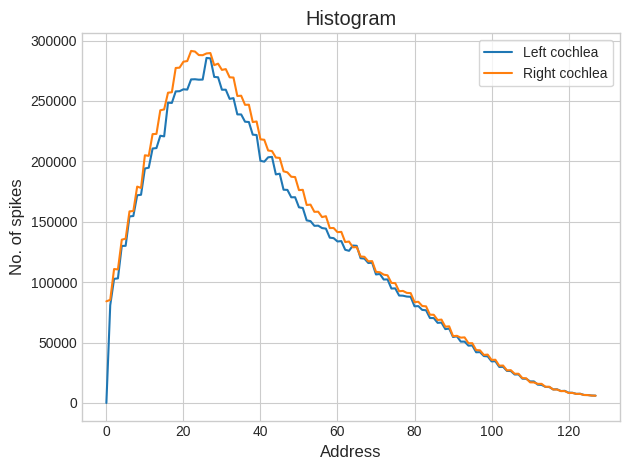

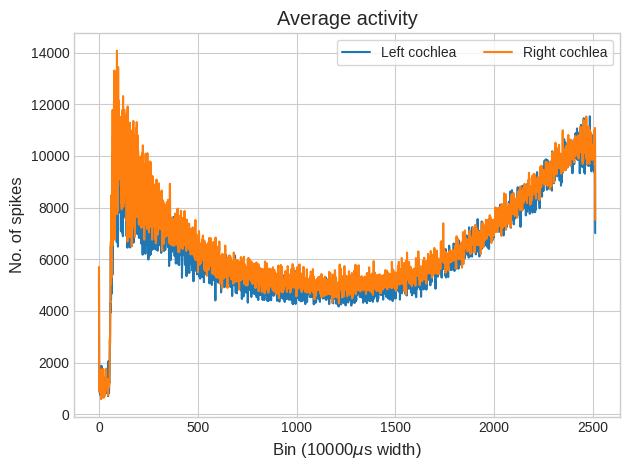

In [ ]:
# Monitor the inputs
MAX_INPUTS = 3
INPUTS = ['port_a']
MAX_SPIKES = 10000
DURATION = 1 # in seconds
USB_TRANSFER_LENGTH = 16 * 1024
# Set USB transfer length and number of buffers
okaer.USB_TRANSFER_LENGTH = USB_TRANSFER_LENGTH
MONITOR_MODE_TEST = 'duration'  # 'duration', 'num_spikes', 'live'

# okaer.reset_board(mode='both')

match MONITOR_MODE_TEST:
    case 'duration':
        okaer.logger.info("Monitoring for a duration of %d seconds", DURATION)
        spikes = okaer.monitor(inputs=INPUTS, duration=DURATION)
    case 'num_spikes':
        okaer.logger.info("Monitoring until %d spikes are collected", MAX_SPIKES)
        spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES)
    case 'live':
        okaer.monitor(inputs=INPUTS, live=True)
        start = time.time()
        spikes = None
        while (time.time() - start) < DURATION:
            # time.sleep(0.01)
            partial_spikes = okaer.get_live_spikes()  # Obtener spikes sin detener
            if partial_spikes is not None:
                if spikes is None:
                    spikes = partial_spikes
                else:
                    [spikes[i].addresses.extend(partial_spikes[i].addresses) for i in range(MAX_INPUTS)]
                    [spikes[i].timestamps.extend(partial_spikes[i].timestamps) for i in range(MAX_INPUTS)]
                    okaer.logger.debug("Collected partial spikes during live monitoring")
            
        final_spikes = okaer.stop_monitor()  # Detener y obtener todos los spikes
        [spikes[i].addresses.extend(final_spikes[i].addresses) for i in range(MAX_INPUTS)]
        [spikes[i].timestamps.extend(final_spikes[i].timestamps) for i in range(MAX_INPUTS)]
        okaer.logger.info("Monitoring in live mode for a duration of %d seconds", DURATION)
    case _:
        okaer.logger.error("Invalid MONITOR_MODE_TEST: %s", MONITOR_MODE_TEST)
        sys.exit(1)

# Check if spikes is not None. If so, finish the script
if spikes is None:
    okaer.logger.error("No spikes were recorded. Exiting the script.")
    sys.exit(1)
    
# Print the number of spikes for each input
for i in range(MAX_INPUTS):
    okaer.logger.info("Input %d: %d spikes", i, spikes[i].get_num_spikes())

# Create pyNAVIS spike_file only if there are spikes for a specific input
okaer.logger.info("Creating spike files for all selected inputs")
spike_files = []
for i in range(MAX_INPUTS):
    if spikes[i].get_num_spikes() > 0:
        spike_files.append(SpikesFile(addresses=spikes[i].addresses, timestamps=spikes[i].timestamps))

# Add this cell BEFORE plotting to verify data integrity
import numpy as np

okaer.logger.info("=== DATA INTEGRITY CHECK ===")

# IMPORTANT: Timestamps are in 10ns ticks (hardware clock period)
TIMESTAMP_TICK_US = 0.01  # Each tick = 10ns = 0.01 microseconds

for i in range(len(spike_files)):
    if len(spike_files[i].timestamps) == 0:
        okaer.logger.warning(f"Input {INPUTS[i]}: No spikes recorded")
        continue
    
    timestamps = np.array(spike_files[i].timestamps)
    addresses = np.array(spike_files[i].addresses)
    
    okaer.logger.info(f"\--- Input {INPUTS[i]} ---")
    okaer.logger.info(f"Total spikes: {len(timestamps)}")
    okaer.logger.info(f"Timestamp range (ticks): {timestamps.min()} - {timestamps.max()}")
    okaer.logger.info(f"Timestamp range (µs): {timestamps.min() * TIMESTAMP_TICK_US:.2f} - {timestamps.max() * TIMESTAMP_TICK_US:.2f}")
    okaer.logger.info(f"Duration (ms): {(timestamps.max() - timestamps.min()) * TIMESTAMP_TICK_US / 1000:.2f}")
    okaer.logger.info(f"Address range: {addresses.min()} - {addresses.max()}")
    
    # Check for timestamp ordering
    if not np.all(timestamps[:-1] <= timestamps[1:]):
        okaer.logger.error(f"Timestamps are NOT in ascending order!")
        bad_idx = np.where(timestamps[:-1] > timestamps[1:])[0][0]
        okaer.logger.error(f"First violation at index {bad_idx}: {timestamps[bad_idx]} > {timestamps[bad_idx+1]}")
    else:
        okaer.logger.info("✓ Timestamps are in ascending order")
    
    # Check for negative timestamps
    if np.any(timestamps < 0):
        okaer.logger.error(f"Found {np.sum(timestamps < 0)} negative timestamps!")
    else:
        okaer.logger.info("✓ No negative timestamps")
    
    # Check timestamp deltas (should be reasonable for audio events)
    if len(timestamps) > 1:
        deltas = np.diff(timestamps)
        mean_delta_ns = np.mean(deltas) * 10  # Convert ticks to nanoseconds
        median_delta_ns = np.median(deltas) * 10
        max_delta_ns = np.max(deltas) * 10
        
        okaer.logger.info(f"Timestamp deltas (ns): mean={mean_delta_ns:.1f}, median={median_delta_ns:.1f}, max={max_delta_ns:.1f}")
        
        # Expected delta for sequential addresses (e.g., ~24 ticks = 240ns)
        if addresses.max() - addresses.min() > 200:  # If we have many addresses
            okaer.logger.info(f"Expected delta for sequential scan: ~240ns (24 ticks @ 10ns)")
    
    # Calculate event rate
    duration_s = (timestamps.max() - timestamps.min()) * TIMESTAMP_TICK_US / 1e6  # Convert to seconds
    if duration_s > 0:
        event_rate = len(timestamps) / duration_s
        okaer.logger.info(f"Event rate: {event_rate:.0f} spikes/sec")
        
        # Check if rate is reasonable (typical audio: 1k-1M events/sec)
        if event_rate > 10_000_000:
            okaer.logger.warning(f"Event rate seems very high: {event_rate:.0f} spikes/sec")
        elif event_rate < 100:
            okaer.logger.warning(f"Event rate seems very low: {event_rate:.0f} spikes/sec")
        else:
            okaer.logger.info("✓ Event rate within reasonable range")
    
    # Check address distribution
    unique_addrs = np.unique(addresses)
    okaer.logger.info(f"Unique addresses: {len(unique_addrs)}")
    okaer.logger.info(f"Address range: {addresses.min()} to {addresses.max()}")
    
    # Check if addresses are sequential (as expected after reset)
    if len(unique_addrs) > 10:
        expected_sequential = np.arange(addresses.min(), addresses.max() + 1)
        if np.array_equal(np.sort(unique_addrs), expected_sequential):
            okaer.logger.info("✓ Addresses are sequential (as expected after reset)")
        else:
            missing = set(expected_sequential) - set(unique_addrs)
            if missing:
                okaer.logger.info(f"Some addresses missing: {sorted(missing)[:10]}...")
    
    # Show distribution for most active addresses
    addr_counts = np.bincount(addresses.astype(int))
    top_10_indices = np.argsort(addr_counts)[-10:][::-1]
    top_10_counts = addr_counts[top_10_indices]
    okaer.logger.info(f"Top 10 addresses by count:")
    for addr, count in zip(top_10_indices, top_10_counts):
        if count > 0:
            okaer.logger.info(f"  Address {addr}: {count} events")

okaer.logger.info("=== END DATA INTEGRITY CHECK ===")

for i in range(len(spike_files)):
    okaer.logger.info("Plotting the spikegram for input %s", INPUTS[i])
    Plots.spikegram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Plotting the sonogram for input %s", INPUTS[i])
    Plots.sonogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Plotting the histogram for input %s", INPUTS[i])
    Plots.histogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Plotting the average activity for input %s", INPUTS[i])
    Plots.average_activity(spike_files[i], settings)


### Bypassing the NAS output to OKAERTool output data bus
The NAS output can be bypassed to the OKAERTool output data bus using the `bypass` command of the OKAERTool class. This is useful to test the NAS output without the OKAERTool processing. The script below bypasses the NAS output to the OKAERTool output data bus.

In [ ]:
# okaer.reset_board(mode='both')

# Monitor the inputs
INPUTS = ['port_c']

# Bypass the inputs to the outputs
okaer.bypass(inputs=INPUTS)